In [1]:
import numpy as np
# Basic Import
# import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import matplotlib.pyplot as plt
# import seaborn as sns
# # Modelling
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
# from sklearn.svm import SVR
# from sklearn.linear_model import LinearRegression, Ridge,Lasso
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# import warnings

In [2]:
df = pd.read_csv('data/predictive_maintenance.csv')

In [3]:
df.head()

,udi,product_id,type,air_temp,process_temp,rotational_speed,torque,tool_wear,target,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
input_vars = ['type', 'air_temp', 'process_temp', 'rotational_speed', 'torque', 'tool_wear']
num_vars = ['air_temp', 'process_temp', 'rotational_speed', 'torque', 'tool_wear']
cat_vars = ['type']

In [5]:
X = df[input_vars]
y = df['target']

In [6]:
# Create Column Transformer with 3 types of transformers
num_features = X[num_vars]
cat_features = X[cat_vars]

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_vars),
         ("StandardScaler", numeric_transformer, num_vars),
    ]
)

In [7]:
X = preprocessor.fit_transform(X)

In [8]:
X.shape

(10000, 8)

In [9]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8000, 8), (2000, 8))

In [10]:
def evaluate_classification(y_true, y_pred):
    """
    Evaluate classification performance for binary targets.

    Args:
    - y_true: Actual labels (boolean or 0/1)
    - y_pred: Predicted labels (0/1)

    Prints precision, recall, F1 score, and displays confusion matrix.
    """
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Failure", "Failure"])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()


In [11]:

# Define hyperparameter search space
search_space = {
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'n_estimators': Integer(50, 200),
    'gamma': Real(0.0, 5.0)
}

In [12]:
# Initialize model and BayesSearchCV
xgb = XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss')
opt = BayesSearchCV(xgb, search_spaces=search_space, n_iter=50, cv=3, scoring='f1', n_jobs=-1, verbose=1)


In [13]:
# Run optimization
opt.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='logloss', feature_types=None,
                                      feature_weights=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constrain...
                             'gamma': Real(low=0.0, high=5.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.2, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=200, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')},
              verbose=1)

In [14]:
print("Best params:", opt.best_params_)
print("Best CV f1:", opt.best_score_)

Best params: OrderedDict({'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.11507917523574591, 'max_depth': 10, 'n_estimators': 132, 'subsample': 1.0})
Best CV f1: 0.7049091191548857


In [17]:
best_params = opt.best_params_

In [18]:
# Re-train model on the training set using best parameters
final_model = XGBClassifier(
    **best_params,
    objective='binary:logistic',
    eval_metric='logloss'  # Avoids warnings in newer XGBoost versions
)

In [19]:
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.11507917523574591,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=132, n_jobs=None,
              num_parallel_tree=None, ...)

In [20]:
y_test_pred = final_model.predict(X_test)

Precision: 0.9302
Recall:    0.6557
F1 Score:  0.7692


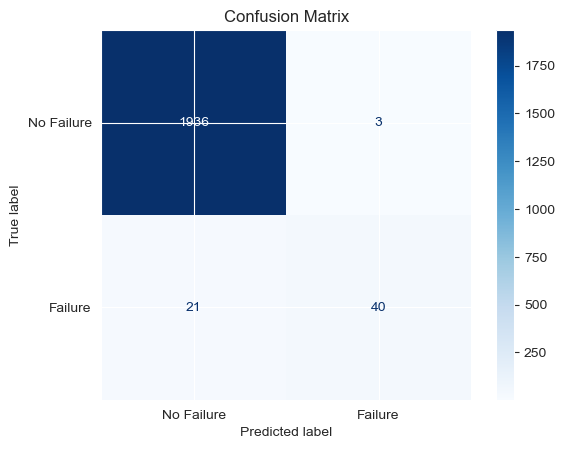

In [21]:
evaluate_classification(y_test, y_test_pred)